In [7]:
from pandas import *
import datetime as datetime
df1=read_excel(r'C:\Users\Emphyd12178nkum1\Downloads\New Inventory.xlsx')
df2=read_excel(r'C:\Users\Emphyd12178nkum1\Downloads\Inventory Dataset.xlsx')
k={'Inventory Receive': 'Date'}
f={'Inventory':'Total Item Qty',}
df3=df1.rename(columns=k)
# merged_df
# df3['Date'] = to_datetime(df3['Date'])
# df2['Date']=to_datetime(df2['Date'])
merged_df=merge(df3,df2,on=['Item Number','Date',],how='left')
merged_df['Day'] = merged_df['Date'].astype('datetime64[ns]')

print(merged_df)
weekly_data = merged_df.groupby("Item Number").resample('W-Mon', label='left', closed = 'left', on='Day').sum().reset_index().sort_values(by='Day')
inventory_levels = weekly_data.pivot_table(index='Item Number', columns='Day', values=['Total Item Qty','Inventory'], aggfunc='sum',fill_value=0)

inventory_levels.columns = [f"{col[1].strftime('%m/%d/%Y')}" for col in inventory_levels.columns]

inventory_levels


      Item Number       Date  Total Item Qty  Inventory        Day
0     064-13-0002 2023-07-07             700        NaN 2023-07-07
1     064-13-0338 2023-07-07            1700        NaN 2023-07-07
2     064-13-0340 2023-07-07            1000        NaN 2023-07-07
3     064-13-0353 2023-07-07            1900        NaN 2023-07-07
4     064-13-0416 2023-07-07            1000        NaN 2023-07-07
5     064-13-0010 2023-07-09            3140        NaN 2023-07-09
6     064-15-5738 2023-07-09            5976        NaN 2023-07-09
7     064-15-5777 2023-07-09            4428        NaN 2023-07-09
8     064-15-6305 2023-07-09            7352        NaN 2023-07-09
9     064-15-7068 2023-07-09            9064        NaN 2023-07-09
10    064-15-7174 2023-07-09            6276        NaN 2023-07-09
11    064-18-2305 2023-07-21            1134        NaN 2023-07-21
12    064-18-2358 2023-07-21            1620        NaN 2023-07-21
13    064-18-0267 2023-07-21            1302        NaN 2023-0

,07/03/2023,07/10/2023,07/17/2023,07/24/2023,07/31/2023,08/07/2023,08/14/2023,08/21/2023,08/28/2023,09/04/2023,...,09/11/2023,09/18/2023,09/25/2023,10/02/2023,10/09/2023,10/16/2023,11/20/2023,11/27/2023,12/04/2023,12/11/2023
Item Number,,,,,,,,,,,,,,,,,,,,,
064-01-0003,0,0,0,0,0,0,0,0,0,0,...,0,0,5488,0,1864,0,0,0,0,0
064-01-0005,0,0,0,0,0,0,0,0,0,0,...,0,0,7380,0,2520,0,0,0,0,0
064-01-0012,0,0,0,0,0,0,0,0,0,0,...,0,0,6840,0,3244,0,0,0,0,0
064-01-0013,0,0,0,0,0,0,0,0,0,0,...,0,0,6300,0,1748,0,0,0,0,0
064-01-0016,0,0,0,0,0,0,0,0,0,0,...,0,0,6028,0,1608,0,0,0,0,0
064-01-0017,0,0,0,0,0,0,0,0,0,0,...,0,0,5220,0,916,0,0,0,0,0
064-01-0018,0,0,0,0,0,0,0,0,0,0,...,0,0,5760,0,2164,0,0,0,0,0
064-01-0019,0,0,0,0,0,0,0,0,0,0,...,0,0,7648,0,4056,0,0,0,0,0
064-01-0035,0,0,0,0,0,0,0,0,0,0,...,0,0,5488,0,1864,0,0,0,0,0


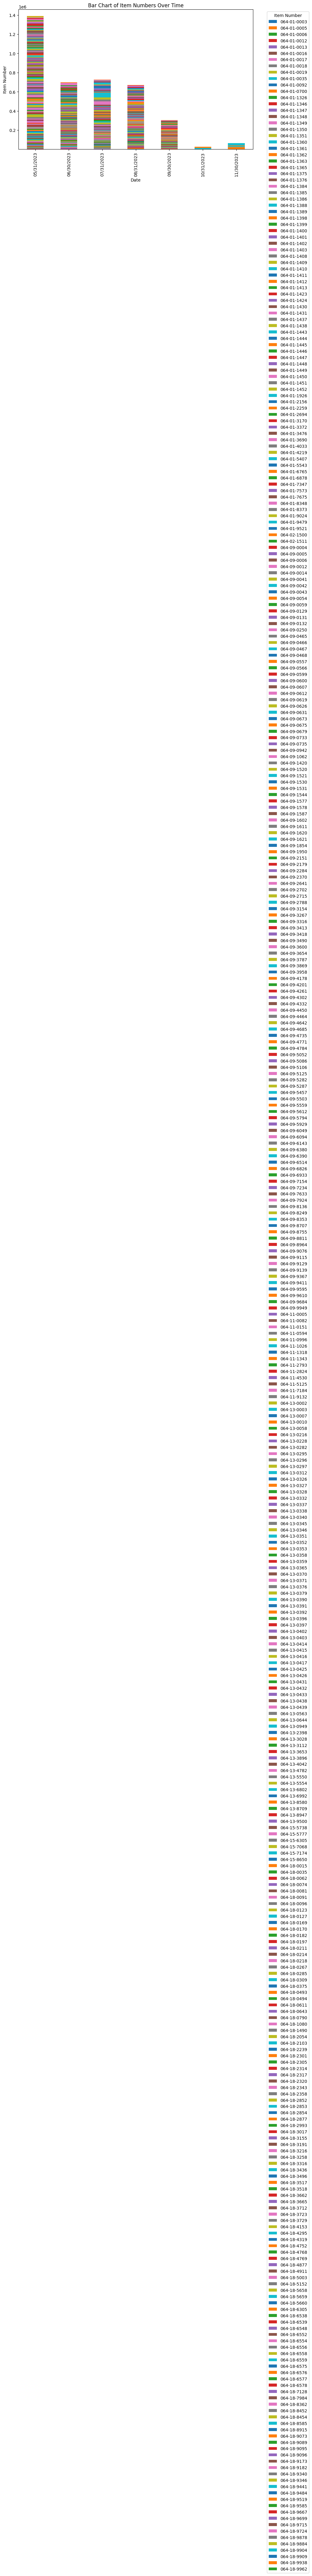

In [2]:
import matplotlib.pyplot as plt

df4=df2.rename(columns=f)
merged_df=merge(df3,df4,on=['Item Number','Date','Total Item Qty'],how='outer')
merged_df['Day'] = merged_df['Date'].astype('datetime64[ns]')

# print(merged_df)
weekly_data = merged_df.groupby("Item Number").resample('M', label='left', closed = 'left', on='Day').sum().reset_index().sort_values(by='Day')
inventory_levels = weekly_data.pivot_table(index='Item Number', columns='Day', values=['Total Item Qty'], aggfunc='sum',fill_value=0)

inventory_levels.columns = [f"{col[1].strftime('%m/%d/%Y')}" for col in inventory_levels.columns]

df_transposed =inventory_levels.T
ax = df_transposed.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Bar Chart of Item Numbers Over Time')
plt.xlabel('Date')
plt.ylabel('Item Number')
plt.legend(title='Item Number', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
